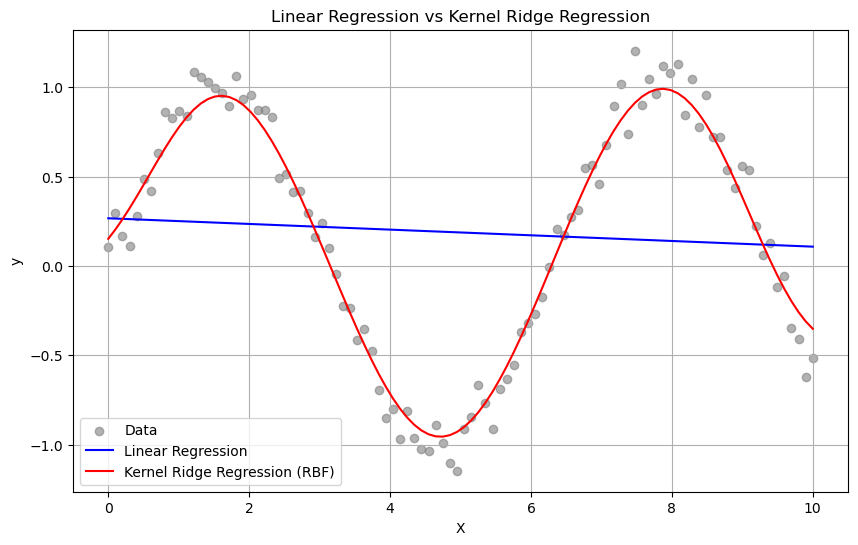

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

# Generate data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + 0.1 * np.random.randn(100)

# Linear Regression
lr = LinearRegression()
lr.fit(X, y)
y_lr = lr.predict(X)

# Kernel Ridge Regression (RBF Kernel)
krr = KernelRidge(kernel='rbf', alpha=1.0, gamma=0.5)
krr.fit(X, y)
y_krr = krr.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='Data', alpha=0.6)
plt.plot(X, y_lr, color='blue', label='Linear Regression')
plt.plot(X, y_krr, color='red', label='Kernel Ridge Regression (RBF)')
plt.legend()
plt.title("Linear Regression vs Kernel Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()


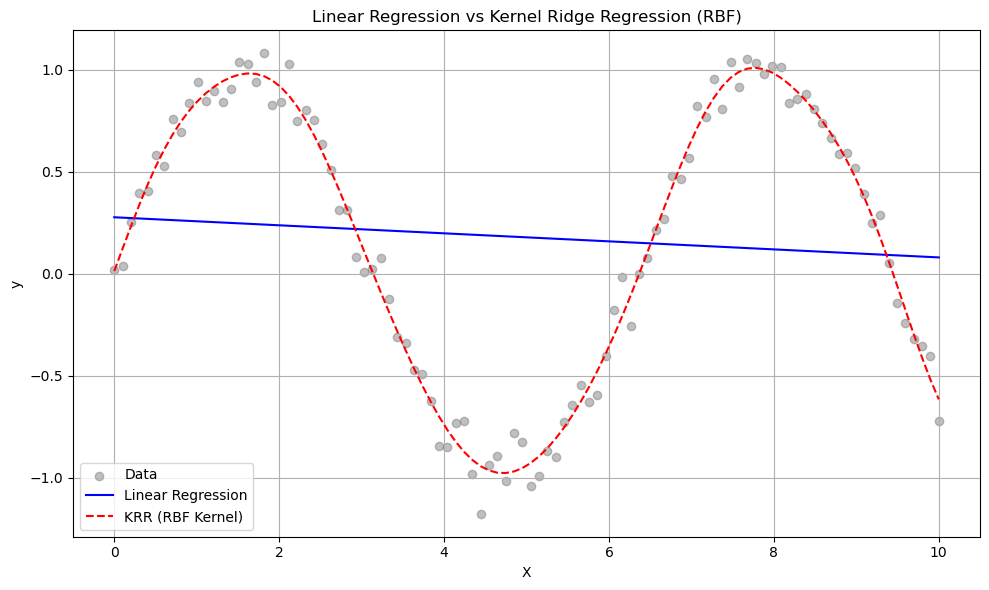

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- Custom Kernel Ridge Regression class ---
class KernelRidgeRegression:
    def __init__(self, kernel='rbf', lam=0.1, degree=3, gamma=None, coef0=1):
        self.kernel = kernel
        self.lam = lam
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.alpha = None
        self.X_train = None
        self.X_mean = None
        self.y_mean = None
    
    def _compute_kernel(self, X1, X2):
        if self.kernel == 'linear':
            return X1 @ X2.T
        elif self.kernel == 'rbf':
            if self.gamma is None:
                self.gamma = 1 / X1.shape[1]
            pairwise_sq_dists = np.sum(X1**2, axis=1)[:, np.newaxis] + \
                                 np.sum(X2**2, axis=1) - 2 * (X1 @ X2.T)
            return np.exp(-self.gamma * pairwise_sq_dists)
        else:
            raise ValueError("Only 'linear' and 'rbf' kernels are supported in this example.")
    
    def fit(self, X, y):
        self.X_mean = np.mean(X, axis=0)
        self.y_mean = np.mean(y)
        X = X - self.X_mean
        y = y - self.y_mean
        self.X_train = X
        K = self._compute_kernel(X, X)
        self.alpha = np.linalg.inv(K + self.lam * np.eye(len(X))) @ y
    
    def predict(self, X):
        X = X - self.X_mean
        K_test = self._compute_kernel(X, self.X_train)
        return K_test @ self.alpha + self.y_mean

# === Generate non-linear (sinusoidal) data ===
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + 0.1 * np.random.randn(100)

# === Linear Regression ===
lr = LinearRegression()
lr.fit(X, y)
y_lr = lr.predict(X)

# === Kernel Ridge Regression (RBF Kernel) ===
krr_rbf = KernelRidgeRegression(kernel='rbf', lam=0.01, gamma=0.5)
krr_rbf.fit(X, y)
y_krr_rbf = krr_rbf.predict(X)

# === Plotting ===
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label='Data')
plt.plot(X, y_lr, label='Linear Regression', color='blue')
plt.plot(X, y_krr_rbf, label='KRR (RBF Kernel)', color='red', linestyle='--')
plt.legend()
plt.title("Linear Regression vs Kernel Ridge Regression (RBF)")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.tight_layout()
plt.show()


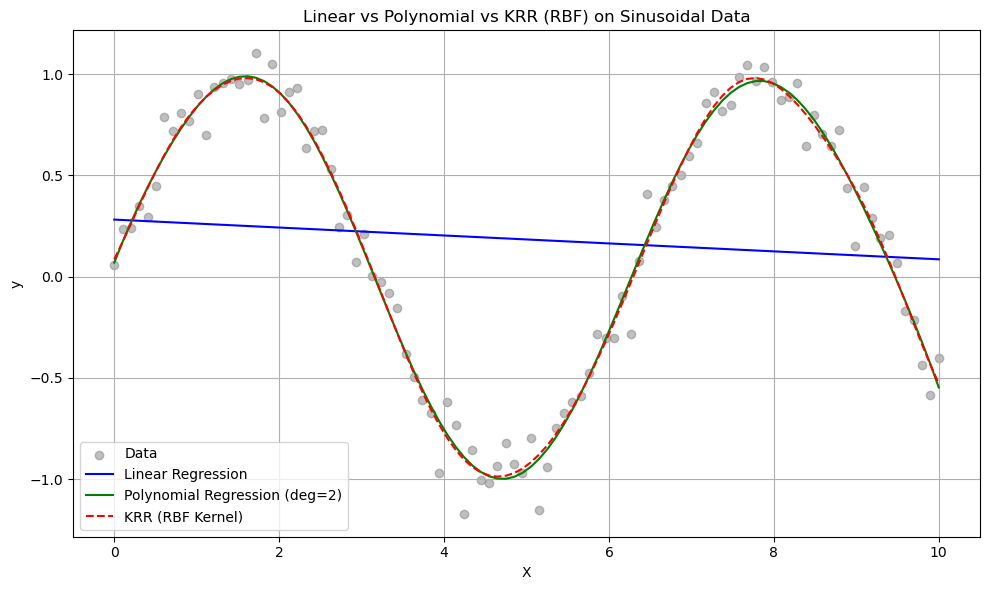

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# --- Custom Kernel Ridge Regression class ---
class KernelRidgeRegression:
    def __init__(self, kernel='rbf', lam=0.1, degree=3, gamma=None, coef0=1):
        self.kernel = kernel
        self.lam = lam
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.alpha = None
        self.X_train = None
        self.X_mean = None
        self.y_mean = None
    
    def _compute_kernel(self, X1, X2):
        if self.kernel == 'linear':
            return X1 @ X2.T
        elif self.kernel == 'poly':
            return (X1 @ X2.T + self.coef0) ** self.degree
        elif self.kernel == 'rbf':
            if self.gamma is None:
                self.gamma = 1 / X1.shape[1]
            pairwise_sq_dists = np.sum(X1**2, axis=1)[:, np.newaxis] + \
                                 np.sum(X2**2, axis=1) - 2 * (X1 @ X2.T)
            return np.exp(-self.gamma * pairwise_sq_dists)
        elif self.kernel == 'sigmoid':
            return np.tanh(self.gamma * (X1 @ X2.T) + self.coef0)
        elif self.kernel == 'laplacian':
            pairwise_abs_dists = np.abs(X1[:, np.newaxis] - X2).sum(axis=2)
            return np.exp(-self.gamma * pairwise_abs_dists)
        else:
            raise ValueError("Unsupported kernel.")
    
    def fit(self, X, y):
        self.X_mean = np.mean(X, axis=0)
        self.y_mean = np.mean(y)
        X = X - self.X_mean
        y = y - self.y_mean
        self.X_train = X
        K = self._compute_kernel(X, X)
        self.alpha = np.linalg.inv(K + self.lam * np.eye(len(X))) @ y
    
    def predict(self, X):
        X = X - self.X_mean
        K_test = self._compute_kernel(X, self.X_train)
        return K_test @ self.alpha + self.y_mean

# === Generate non-linear (sinusoidal) data ===
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + 0.1 * np.random.randn(100)

# === Linear Regression ===
lr = LinearRegression()
lr.fit(X, y)
y_lr = lr.predict(X)

# === Polynomial Regression (degree 2) ===
poly_model = make_pipeline(PolynomialFeatures(degree=9), LinearRegression())
poly_model.fit(X, y)
y_poly = poly_model.predict(X)

# === Custom Kernel Ridge Regression (RBF Kernel) ===
krr_rbf = KernelRidgeRegression(kernel='rbf', lam=0.01, gamma=0.5)
krr_rbf.fit(X, y)
y_krr_rbf = krr_rbf.predict(X)

# === Plotting ===
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label='Data')
plt.plot(X, y_lr, label='Linear Regression', color='blue')
plt.plot(X, y_poly, label='Polynomial Regression (deg=2)', color='green')
plt.plot(X, y_krr_rbf, label='KRR (RBF Kernel)', color='red', linestyle='--')
plt.legend()
plt.title("Linear vs Polynomial vs KRR (RBF) on Sinusoidal Data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.tight_layout()
plt.show()


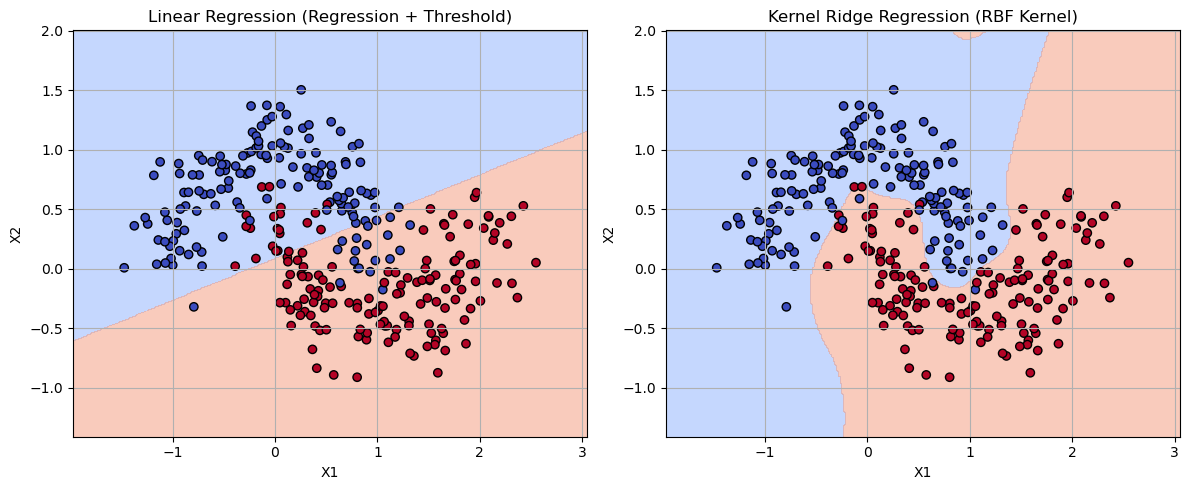

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate 2D classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
y_reg = y * 2 - 1  # Convert to {-1, +1} for regression style

# --- Custom Kernel Ridge Regression class (same as before) ---
class KernelRidgeRegression:
    def __init__(self, kernel='rbf', lam=0.1, degree=3, gamma=None, coef0=1):
        self.kernel = kernel
        self.lam = lam
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.alpha = None
        self.X_train = None
        self.X_mean = None
        self.y_mean = None
    
    def _compute_kernel(self, X1, X2):
        if self.kernel == 'rbf':
            if self.gamma is None:
                self.gamma = 1 / X1.shape[1]
            pairwise_sq_dists = np.sum(X1**2, axis=1)[:, np.newaxis] + \
                                 np.sum(X2**2, axis=1) - 2 * (X1 @ X2.T)
            return np.exp(-self.gamma * pairwise_sq_dists)
        elif self.kernel == 'linear':
            return X1 @ X2.T
        else:
            raise ValueError("Use 'rbf' or 'linear' for this demo.")
    
    def fit(self, X, y):
        self.X_mean = np.mean(X, axis=0)
        self.y_mean = np.mean(y)
        X = X - self.X_mean
        y = y - self.y_mean
        self.X_train = X
        K = self._compute_kernel(X, X)
        self.alpha = np.linalg.inv(K + self.lam * np.eye(len(X))) @ y
    
    def predict(self, X):
        X = X - self.X_mean
        K_test = self._compute_kernel(X, self.X_train)
        return K_test @ self.alpha + self.y_mean

# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X, y_reg)
y_lr_pred = lr.predict(X)

# --- Kernel Ridge Regression (RBF) ---
krr = KernelRidgeRegression(kernel='rbf', lam=0.01, gamma=5)
krr.fit(X, y_reg)
y_krr_pred = krr.predict(X)

# --- Decision boundary plotting ---
def plot_decision_boundary(model, title, threshold=0):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(X_grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z > threshold, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)

# --- Plot both models ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(lr, "Linear Regression (Regression + Threshold)")

plt.subplot(1, 2, 2)
plot_decision_boundary(krr, "Kernel Ridge Regression (RBF Kernel)")

plt.tight_layout()
plt.show()


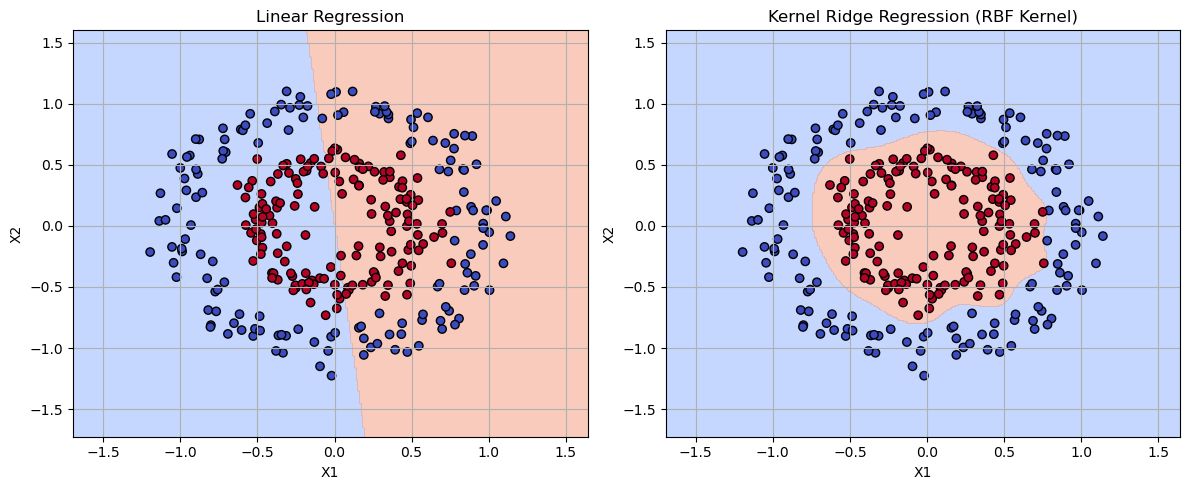

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.linear_model import LinearRegression

# --- Generate concentric circles ---
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)
y_reg = y * 2 - 1  # {-1, 1} for regression-based classification

# --- Custom KRR class (same as before) ---
class KernelRidgeRegression:
    def __init__(self, kernel='rbf', lam=0.1, gamma=None):
        self.kernel = kernel
        self.lam = lam
        self.gamma = gamma
        self.alpha = None
        self.X_train = None
        self.X_mean = None
        self.y_mean = None
    
    def _compute_kernel(self, X1, X2):
        if self.kernel == 'rbf':
            if self.gamma is None:
                self.gamma = 1 / X1.shape[1]
            pairwise_sq_dists = np.sum(X1**2, axis=1)[:, np.newaxis] + \
                                np.sum(X2**2, axis=1) - 2 * (X1 @ X2.T)
            return np.exp(-self.gamma * pairwise_sq_dists)
        elif self.kernel == 'linear':
            return X1 @ X2.T
        else:
            raise ValueError("Only 'rbf' and 'linear' kernels supported.")
    
    def fit(self, X, y):
        self.X_mean = np.mean(X, axis=0)
        self.y_mean = np.mean(y)
        X = X - self.X_mean
        y = y - self.y_mean
        self.X_train = X
        K = self._compute_kernel(X, X)
        self.alpha = np.linalg.inv(K + self.lam * np.eye(len(X))) @ y
    
    def predict(self, X):
        X = X - self.X_mean
        K_test = self._compute_kernel(X, self.X_train)
        return K_test @ self.alpha + self.y_mean

# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X, y_reg)

# --- Kernel Ridge Regression (RBF) ---
krr = KernelRidgeRegression(kernel='rbf', lam=0.01, gamma=10)
krr.fit(X, y_reg)

# --- Decision boundary plotter ---
def plot_decision_boundary(model, title, threshold=0):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(X_grid).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z > threshold, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)

# --- Plot results ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(lr, "Linear Regression")

plt.subplot(1, 2, 2)
plot_decision_boundary(krr, "Kernel Ridge Regression (RBF Kernel)")

plt.tight_layout()
plt.show()


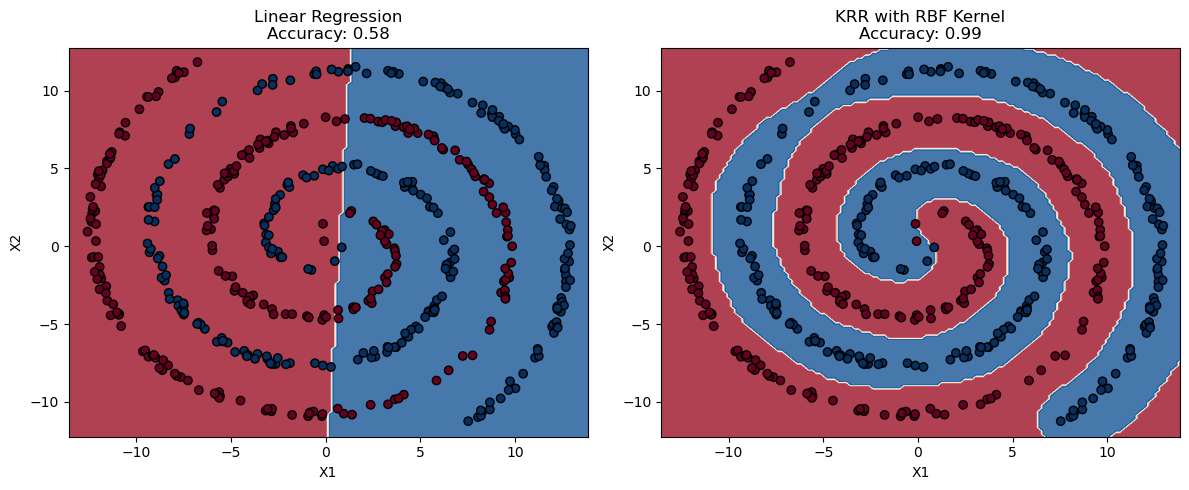

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Generate 2D spiral dataset
def generate_spiral(n_points, noise=0.5):
    n = np.sqrt(np.random.rand(n_points)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points) * noise
    X1 = np.vstack((d1x, d1y)).T
    y1 = np.zeros(n_points)

    d2x = np.cos(n)*n + np.random.rand(n_points) * noise
    d2y = -np.sin(n)*n + np.random.rand(n_points) * noise
    X2 = np.vstack((d2x, d2y)).T
    y2 = np.ones(n_points)

    X = np.vstack((X1, X2))
    y = np.concatenate((y1, y2))
    return X, y

# Generate and split data
X, y = generate_spiral(250, noise=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression (used for classification)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_pred_lr_binary = (y_pred_lr > 0.5).astype(int)  # Convert to binary
acc_lr = accuracy_score(y_test, y_pred_lr_binary)

# Kernel Ridge Regression
krr = KernelRidge(kernel='rbf', alpha=1.0, gamma=5)
krr.fit(X_train_scaled, y_train)
y_pred_krr = krr.predict(X_test_scaled)
y_pred_krr_binary = (y_pred_krr > 0.5).astype(int)
acc_krr = accuracy_score(y_test, y_pred_krr_binary)

# Plot decision boundaries
def plot_decision_boundary(model, X, y, title, is_krr=False):
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled)
    if is_krr or isinstance(model, LinearRegression):
        Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")

# Visualize
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(lr, X, y, f"Linear Regression\nAccuracy: {acc_lr:.2f}")

plt.subplot(1, 2, 2)
plot_decision_boundary(krr, X, y, f"KRR with RBF Kernel\nAccuracy: {acc_krr:.2f}", is_krr=True)

plt.tight_layout()
plt.show()


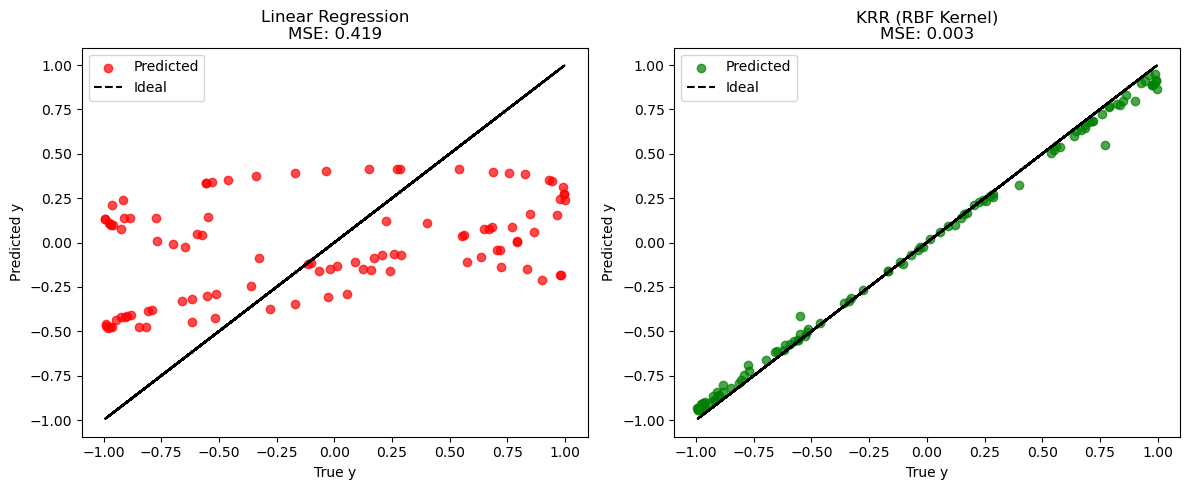

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# === Custom Kernel Ridge Regression Class ===
class KernelRidgeRegression:
    def __init__(self, kernel='rbf', lam=0.1, degree=3, gamma=None, coef0=1):
        self.kernel = kernel
        self.lam = lam
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.alpha = None
        self.X_train = None
        self.X_mean = None
        self.y_mean = None

    def _compute_kernel(self, X1, X2):
        if self.kernel == 'linear':
            return X1 @ X2.T
        elif self.kernel == 'poly':
            return (X1 @ X2.T + self.coef0) ** self.degree
        elif self.kernel == 'rbf':
            if self.gamma is None:
                self.gamma = 1 / X1.shape[1]
            pairwise_sq_dists = np.sum(X1**2, axis=1)[:, np.newaxis] + \
                                np.sum(X2**2, axis=1) - 2 * (X1 @ X2.T)
            return np.exp(-self.gamma * pairwise_sq_dists)
        else:
            raise ValueError("Unsupported kernel.")

    def fit(self, X, y):
        self.X_mean = np.mean(X, axis=0)
        self.y_mean = np.mean(y)
        X = X - self.X_mean
        y = y - self.y_mean
        self.X_train = X
        K = self._compute_kernel(X, X)
        self.alpha = np.linalg.inv(K + self.lam * np.eye(len(X))) @ y

    def predict(self, X):
        X = X - self.X_mean
        K_test = self._compute_kernel(X, self.X_train)
        return K_test @ self.alpha + self.y_mean

# === Spiral Dataset Generator (Regression-style) ===
def generate_spiral_regression(n_points, noise=0.2):
    n = np.sqrt(np.random.rand(n_points)) * 780 * (2*np.pi)/360
    x = np.cos(n)*n + np.random.rand(n_points) * noise
    y = np.sin(n)*n + np.random.rand(n_points) * noise
    target = np.sin(n * 1.5)  # Regression target
    X = np.vstack((x, y)).T
    return X, target

# === Generate and Split Data ===
X, y = generate_spiral_regression(500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Linear Regression ===
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# === Kernel Ridge Regression (RBF Kernel) ===
krr = KernelRidgeRegression(kernel='rbf', lam=1.0, gamma=5)
krr.fit(X_train_scaled, y_train)
y_pred_krr = krr.predict(X_test_scaled)
mse_krr = mean_squared_error(y_test, y_pred_krr)

# === Visualization ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='red', label='Predicted')
plt.plot(y_test, y_test, 'k--', label='Ideal')
plt.title(f"Linear Regression\nMSE: {mse_lr:.3f}")
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_krr, alpha=0.7, color='green', label='Predicted')
plt.plot(y_test, y_test, 'k--', label='Ideal')
plt.title(f"KRR (RBF Kernel)\nMSE: {mse_krr:.3f}")
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.legend()

plt.tight_layout()
plt.show()


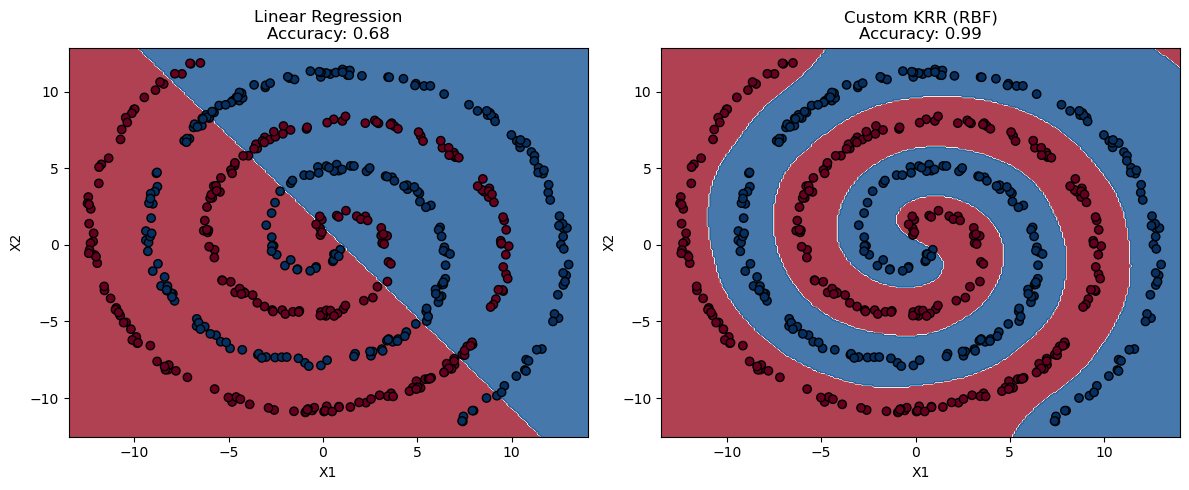

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# === Custom Kernel Ridge Regression Class ===
class KernelRidgeRegression:
    def __init__(self, kernel='rbf', lam=0.1, degree=3, gamma=None, coef0=1):
        self.kernel = kernel
        self.lam = lam
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.alpha = None
        self.X_train = None
        self.X_mean = None
        self.y_mean = None

    def _compute_kernel(self, X1, X2):
        if self.kernel == 'linear':
            return X1 @ X2.T
        elif self.kernel == 'poly':
            return (X1 @ X2.T + self.coef0) ** self.degree
        elif self.kernel == 'rbf':
            if self.gamma is None:
                self.gamma = 1 / X1.shape[1]
            pairwise_sq_dists = np.sum(X1**2, axis=1)[:, np.newaxis] + \
                                np.sum(X2**2, axis=1) - 2 * (X1 @ X2.T)
            return np.exp(-self.gamma * pairwise_sq_dists)
        else:
            raise ValueError("Unsupported kernel.")

    def fit(self, X, y):
        self.X_mean = np.mean(X, axis=0)
        self.y_mean = np.mean(y)
        X = X - self.X_mean
        y = y - self.y_mean
        self.X_train = X
        K = self._compute_kernel(X, X)
        self.alpha = np.linalg.inv(K + self.lam * np.eye(len(X))) @ y

    def predict(self, X):
        X = X - self.X_mean
        K_test = self._compute_kernel(X, self.X_train)
        return K_test @ self.alpha + self.y_mean

# === Spiral Dataset Generator ===
def generate_spiral(n_points, noise=0.5):
    n = np.sqrt(np.random.rand(n_points)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points) * noise
    X1 = np.vstack((d1x, d1y)).T
    y1 = np.zeros(n_points)

    d2x = np.cos(n)*n + np.random.rand(n_points) * noise
    d2y = -np.sin(n)*n + np.random.rand(n_points) * noise
    X2 = np.vstack((d2x, d2y)).T
    y2 = np.ones(n_points)

    X = np.vstack((X1, X2))
    y = np.concatenate((y1, y2))
    return X, y

# === Prepare Data ===
X, y = generate_spiral(250, noise=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Linear Regression ===
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_pred_lr_binary = (y_pred_lr > 0.5).astype(int)
acc_lr = accuracy_score(y_test, y_pred_lr_binary)

# === Custom Kernel Ridge Regression ===
krr = KernelRidgeRegression(kernel='rbf', lam=1.0, gamma=5)
krr.fit(X_train_scaled, y_train)
y_pred_krr = krr.predict(X_test_scaled)
y_pred_krr_binary = (y_pred_krr > 0.5).astype(int)
acc_krr = accuracy_score(y_test, y_pred_krr_binary)

# === Plotting Decision Boundary ===
def plot_decision_boundary(model, X, y, title, is_krr=False):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled)
    if is_krr or isinstance(model, LinearRegression):
        Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")

# === Visualization ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(lr, X, y, f"Linear Regression\nAccuracy: {acc_lr:.2f}")
plt.subplot(1, 2, 2)
plot_decision_boundary(krr, X, y, f"Custom KRR (RBF)\nAccuracy: {acc_krr:.2f}", is_krr=True)
plt.tight_layout()
plt.show()


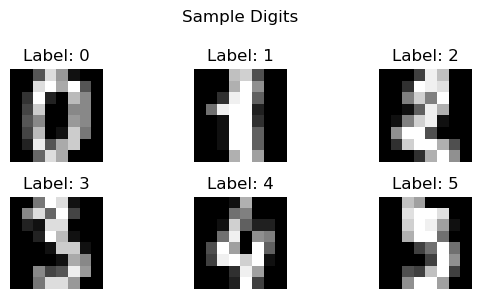

Linear Regression Accuracy: 0.997
KRR with RBF Kernel Accuracy: 0.997


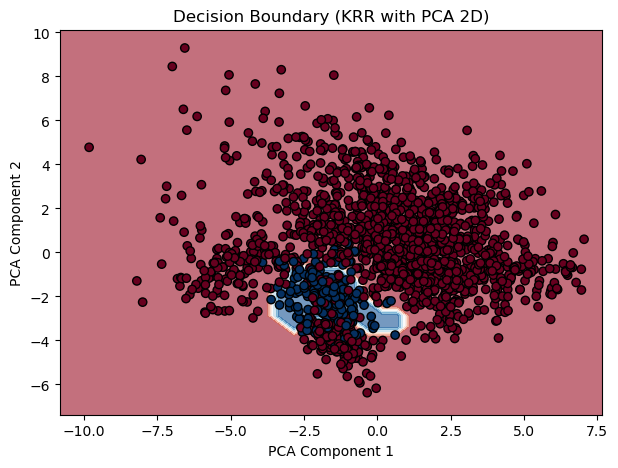

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# === Custom Kernel Ridge Regression ===
class KernelRidgeRegression:
    def __init__(self, kernel='rbf', lam=0.1, degree=3, gamma=None, coef0=1):
        self.kernel = kernel
        self.lam = lam
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.alpha = None
        self.X_train = None
        self.X_mean = None
        self.y_mean = None

    def _compute_kernel(self, X1, X2):
        if self.kernel == 'linear':
            return X1 @ X2.T
        elif self.kernel == 'poly':
            return (X1 @ X2.T + self.coef0) ** self.degree
        elif self.kernel == 'rbf':
            if self.gamma is None:
                self.gamma = 1 / X1.shape[1]
            sq_dists = np.sum(X1**2, axis=1)[:, None] + np.sum(X2**2, axis=1) - 2 * (X1 @ X2.T)
            return np.exp(-self.gamma * sq_dists)
        else:
            raise ValueError("Unsupported kernel.")

    def fit(self, X, y):
        self.X_mean = np.mean(X, axis=0)
        self.y_mean = np.mean(y)
        X = X - self.X_mean
        y = y - self.y_mean
        self.X_train = X
        K = self._compute_kernel(X, X)
        self.alpha = np.linalg.solve(K + self.lam * np.eye(len(X)), y)

    def predict(self, X):
        X = X - self.X_mean
        K_test = self._compute_kernel(X, self.X_train)
        return K_test @ self.alpha + self.y_mean

# === Load MNIST Digits Dataset ===
digits = load_digits()
X = digits.data
y = (digits.target == 0).astype(int)  # 0 vs not-0

# Show sample images
plt.figure(figsize=(6, 3))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.suptitle("Sample Digits")
plt.tight_layout()
plt.show()

# === Preprocessing ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Linear Regression for Classification ===
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_pred_lr_binary = (y_pred_lr > 0.5).astype(int)
acc_lr = accuracy_score(y_test, y_pred_lr_binary)

# === Custom Kernel Ridge Regression ===
krr = KernelRidgeRegression(kernel='rbf', lam=1.0, gamma=0.01)
krr.fit(X_train_scaled, y_train)
y_pred_krr = krr.predict(X_test_scaled)
y_pred_krr_binary = (y_pred_krr > 0.5).astype(int)
acc_krr = accuracy_score(y_test, y_pred_krr_binary)

# === Results ===
print(f"Linear Regression Accuracy: {acc_lr:.3f}")
print(f"KRR with RBF Kernel Accuracy: {acc_krr:.3f}")

# === Visualize decision in 2D using PCA ===
pca = PCA(n_components=2)
X_2D = pca.fit_transform(scaler.transform(X))

krr_2D = KernelRidgeRegression(kernel='rbf', lam=1.0, gamma=1)
krr_2D.fit(X_2D, y)

# Create meshgrid for boundary
h = 0.5
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = krr_2D.predict(grid)
Z = (Z > 0.5).astype(int).reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
plt.title("Decision Boundary (KRR with PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
